## 07 군집화
### 01 K-평균 알고리즘 이해

- k평균은 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트를 선택

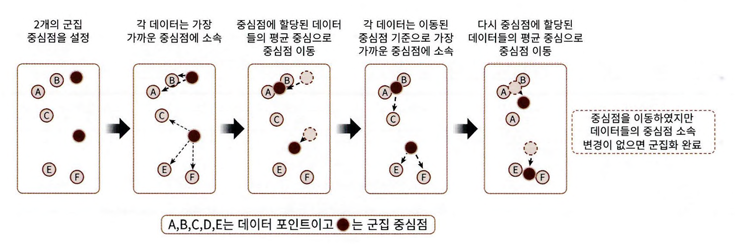

1. 먼저 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓음.
2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속
3. 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동
4. 중심점이 이동했기 떄문에 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속을 변경
5. 다시 중심을 소속된 데이터의 평균 중심으로 이동
6. 중심점을 이동했는데 데이터의 중심점 소속 변경이 없으면 군집화를 종료

  - k 평균의 장점:
    - 일반적인 군집화에서 가장 많이 활용되는 알고리즘
    - 알고리즘이 쉽고 간결함.

  - k 평균의 단점:
    - 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐.
    - 반복을 수행하는데, 반복 횟수가 많을 경우 수행시간이 매우 느려짐
    - 몇 개의 군집(cluster)을 선택해야 할지 가이드하기 어려움
    

### 사이킷런 KMeans 클래스 소개


In [ ]:
class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
                             precompute_distances='auto', verbose=0, random_state=None,
                             copy_x= True, n_jobs=1, algorithm='auto')

- kmeans 초기화 파라미터 중 가장 중요한 파라미터는 n_cluster이며, 이는 군집화할 개수, 즉 군집 중심점의 개수를 의미.
- init은 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++방식으로 최초 설정함.
- max_iter는 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료.
- labels_: 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_: 각 군집 중심점 좌표(Shape는 [군집 개수, 피처 개수]), 이를 이용하면 군집 중심점 좌표가 어디인지를 시각화 가능.



### k-평균을 이용한 붓꽃 데이터 세트 군집화


In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
kmeans.fit(irisDF)

KMeans(max_iter=200, n_clusters=3, random_state=0)

In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


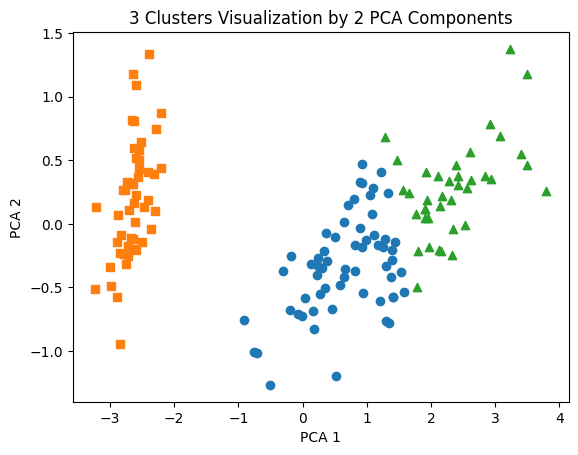

In [ ]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster'] == 0].index
marker1_ind = irisDF[irisDF['cluster'] == 1].index
marker2_ind = irisDF[irisDF['cluster'] == 2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

### 군집화 알고리즘 테스트를 위한 데이터 생성

- n_samples: 생성할 총 데이터의 개수, 디폴트는 100개임.
- n_features: 데이터의 피처 개수, 시각화를 목표로 할 경우 2개로 설정해 보통 첫번째 피처는 x 좌표, 두번쨰 피처는 y 좌표상에 표현
- centers: int 값, 예를 들어, 3으로 설정하면 군집의 개수를 나타냄. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미.
- cluster_std: 생성될 군집 데이터의 표준편차를 의미, 만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어짐. [0.8, 1.2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫번째 군집 내 데이터의 표준편차 0.8, 두번쨰 군집 내 데이터의 표준편차 1.2, 세번쨰 군집 내 표준편차는 0.6으로 만듬. 군집 별로 서로 다른 표준편차를 가진 데이터 세트를 만들 떄 사용.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

# 데이터 생성
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


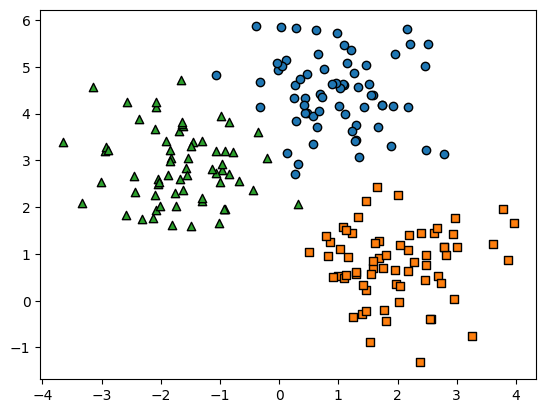

In [ ]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()


<ipython-input-19-1dc197aa09cd>:19: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='' % label)


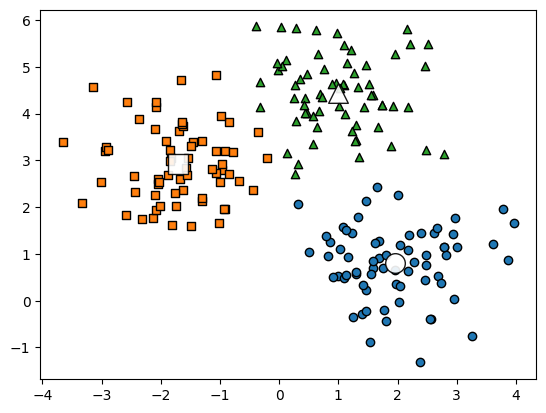

In [ ]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
  label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  # 군집별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='' % label)

plt.show()


In [ ]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


### 02 군집 평가
- 실루엣 분석: 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지
- 실루엣 계수는 개별 데이터가 가지는 군집화 지표로 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리되어 있는지를 나타내는 지표

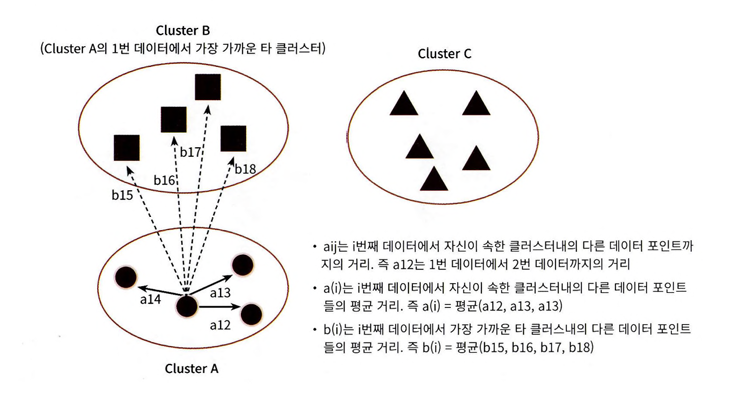

- a(i): 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와으이 거리를 평균한 값 a(i)
- b(i): 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리

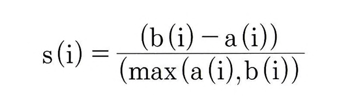

- skelarn.metrics.silhouette_samples(X, labels, metric='euclidean', **kwds): 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터 입력해주면 각 데이터 포인트의 실루엣 계수를 계산해 반환.

- sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds): 실루엣 계수는 값을 평균해 반환

1. 전체 실루엣 계수의 평균값, 즉 사이킷런의 sillhouette_score() 값은 0 ~ 1 사이의 값을 가지며, 1에 가까울수록 좋음
2. 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함.


### 붓꽃 데이터 세트를 이용한 군집 평가

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


In [ ]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.422323
1,0.797604
2,0.436842


### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

- 전체 데이터 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘됐다고 볼 수 없음.
- 특정 군집 내의 실루엣 계수 값만 너무 높고, 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져 있어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있음.

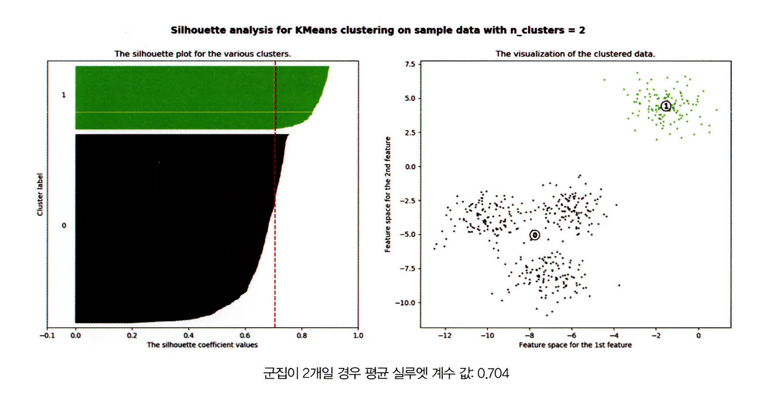

- 군집 개수가 3개일 경우

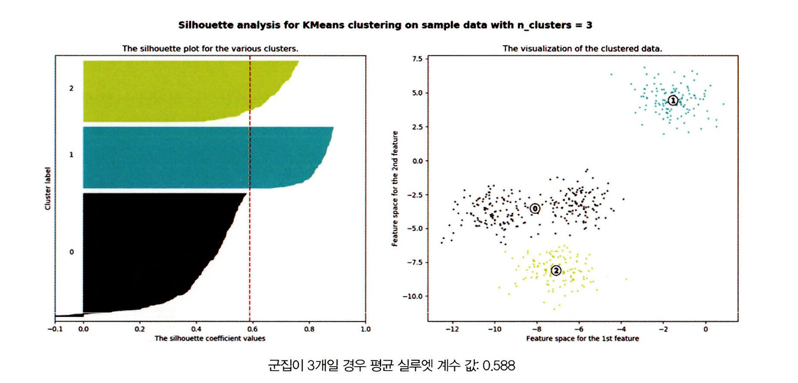

- 군집이 4개일 경우
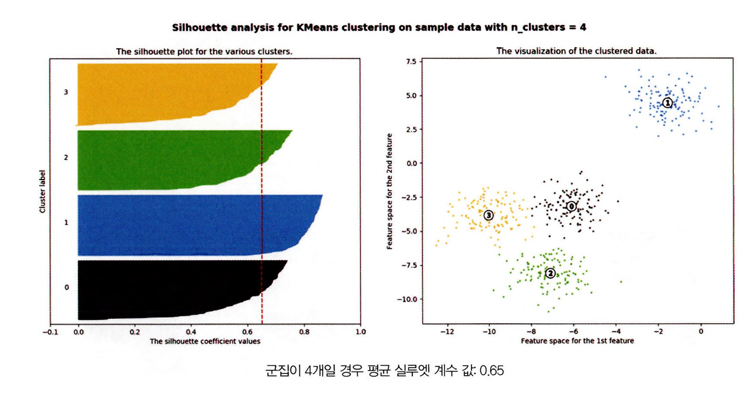

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

def visualize_silhouette(cluster_lists, X_features):
    """
    여러 개의 군집 개수에 대해 KMeans 군집화와 실루엣 계수를 시각화합니다.

    Parameters:
    cluster_lists: list
        군집 개수로 사용할 정수 리스트 (예: [2, 3, 4, 5])
    X_features: array-like
        군집화에 사용할 피처 데이터 세트
    """
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(1, n_cols, figsize=(4 * n_cols, 6))

    if n_cols == 1:
        axs = [axs]  # 단일 subplot에도 리스트로 접근 가능하도록 처리

    for idx, n_clusters in enumerate(cluster_lists):
        # KMeans 모델 학습 및 예측
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        cluster_labels = kmeans.fit_predict(X_features)

        # 실루엣 계수 계산
        silhouette_avg = silhouette_score(X_features, cluster_labels)
        sample_silhouette_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[idx].set_title(f"Clusters: {n_clusters}\nAvg Silhouette: {silhouette_avg:.2f}")
        axs[idx].set_xlim([-0.1, 1])
        axs[idx].set_ylim([0, len(X_features) + (n_clusters + 1) * 10])
        axs[idx].set_xlabel("Silhouette Coefficient Values")
        axs[idx].set_ylabel("Cluster Label")

        # 각 군집별 실루엣 계수 플롯
        for i in range(n_clusters):
            cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            cluster_silhouette_values.sort()

            size_cluster_i = cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            axs[idx].fill_betweenx(
                np.arange(y_lower, y_upper),
                0, cluster_silhouette_values,
                facecolor=color, edgecolor=color, alpha=0.7
            )

            axs[idx].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10  # 10은 클러스터 간의 공백

        axs[idx].axvline(x=silhouette_avg, color="red", linestyle="--")
        axs[idx].set_yticks([])  # y축 틱 제거
        axs[idx].set_xticks(np.arange(-0.1, 1.1, 0.2))

    plt.tight_layout()
    plt.show()

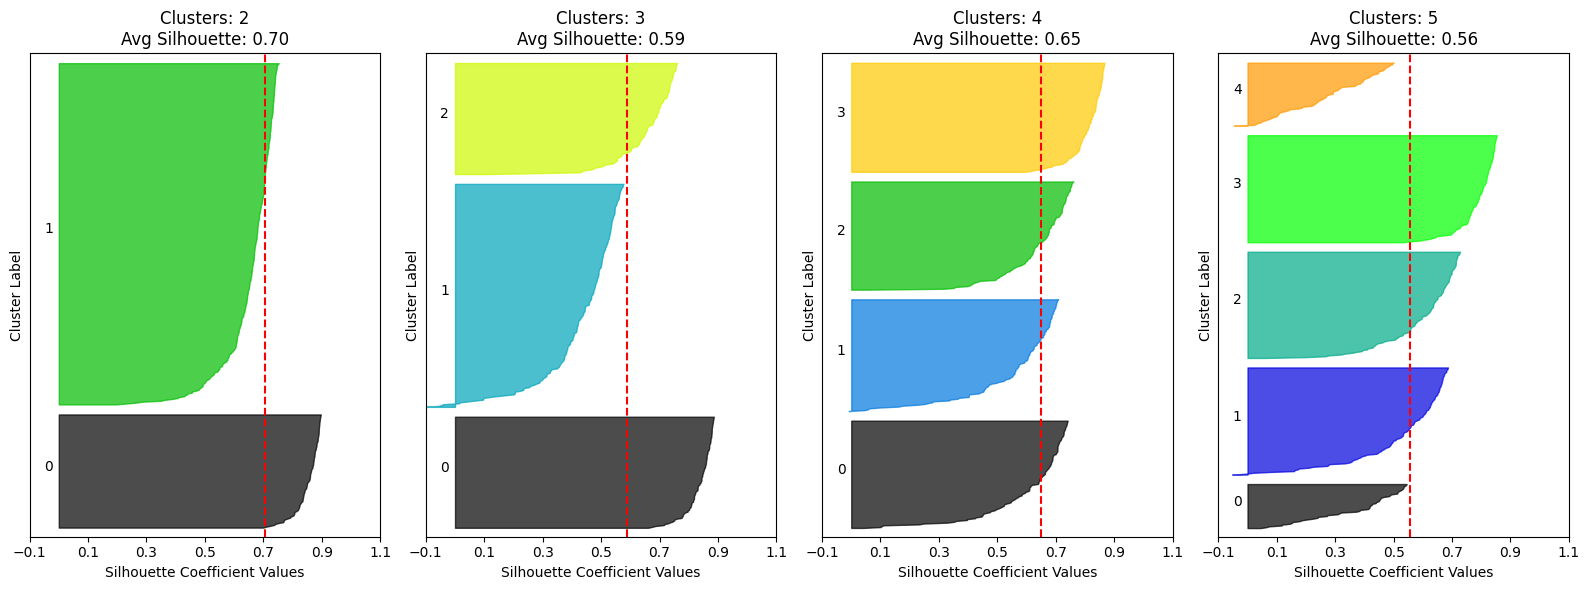

In [ ]:
# visualize_silhouette([2,3,4,5], X_features)
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2, 3, 4, 5], X)